In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

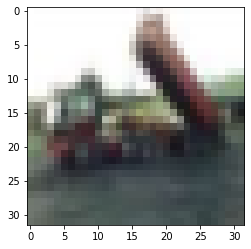

In [6]:
plt.imshow(x_train[2])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [10]:
y_cat_train.shape

(50000, 10)

In [11]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [14]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 52ms/step - loss: 1.7654 - accuracy: 0.3616
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2051 - accuracy: 0.5794
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0270 - accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9040 - accuracy: 0.6886
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8191 - accuracy: 0.7152
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7561 - accuracy: 0.7414
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6997 - accuracy: 0.7639
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6593 - accuracy: 0.7750
Epoch 9/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.6150 - accuracy: 0.7919
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 13ms/step - loss: 1.0694 - accuracy: 0.6765


[1.0694360733032227, 0.6765000224113464]

In [19]:
prediction = model.predict_classes(x_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1000
           1       0.81      0.79      0.80      1000
           2       0.54      0.63      0.58      1000
           3       0.54      0.44      0.49      1000
           4       0.58      0.70      0.64      1000
           5       0.59      0.54      0.57      1000
           6       0.70      0.78      0.74      1000
           7       0.83      0.63      0.72      1000
           8       0.73      0.83      0.78      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

